### Data Visualization

In [92]:
from clean_data import cleaning_data
from data_visualization import most_frequent, dist, most_wine, most_by, relations, precentages, by_date, compute_correlations_matrix
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

In [50]:
data_path = 'data/vivino.csv'
df = cleaning_data(data_path)

In [3]:
df.head()

,Name,Country,Varietal,Wine type,Rating,NumberOfRatings,Year,Price$
0,Robert Mondavi To Kalon Vineyard Reserve Caber...,California,Cabernet Sauvignon,Red Wine,4.7,33,2017,144.99
1,Joseph Phelps Cabernet Sauvignon 2019,California,Cabernet Sauvignon,Red Wine,4.5,45,2019,89.99
2,Stag's Leap Wine Cellars Artemis Cabernet Sauv...,California,Cabernet Sauvignon,Red Wine,4.4,71,2019,77.99
3,Faust Cabernet Sauvignon 2018,California,Cabernet Sauvignon,Red Wine,4.3,427,2018,49.99
4,The Prisoner Wine Company The Prisoner Red Ble...,California,Other Red Blends,Red Wine,4.5,632,2019,48.99


### What is the most wine in the store?

In [4]:
most_frequent('Wine type')

#### <b>Answer:</b> <i>Red wine scores the most.</i>

### What is the distribution of the ratings?

In [5]:
dist('Rating', 'Wine type')

Average wine Rating = 1.22
Most frequent wine Rating = 0.0


### What is the average rating for each Varietal?

In [6]:
most_by('Varietal','Rating')

#### <b>Answer:</b> <i>  Wine scores the most.</i>

### What is the distribution of the reviews?

In [7]:
most_by('Wine type', 'NumberOfRatings')

#### <b>Answer: </b><i>Screw cap wine got the highest numbers of reviews</i>

### Is there a relationship between rating and the number or price?

In [8]:
relations(['Price$', 'Rating'], 'Wine type')

#### <b>Answer: </b><i>All wine with high number of wine got rating more than 4.5<br>White wine have low number of price.</i>

### Is there a relationship between rating and the number of ratings or wine type?

In [9]:
relations(['Rating', 'NumberOfRatings'], 'Wine type')

#### <b>Answer: </b><i>All wine with high number of wine got rating more than 3.5<br>Red wine have low number of price.</i>

### Which wine has the highest rating?

In [10]:
most_by('Wine type', 'Rating')

#### <b>Answer: </b><i>Great Gift has highest rating</i>

### What are the top country for each wine Type?

In [11]:
precentages(['Wine type', 'Country', 'Name'],[4,5], color='Wine type')

### Machine Learning 

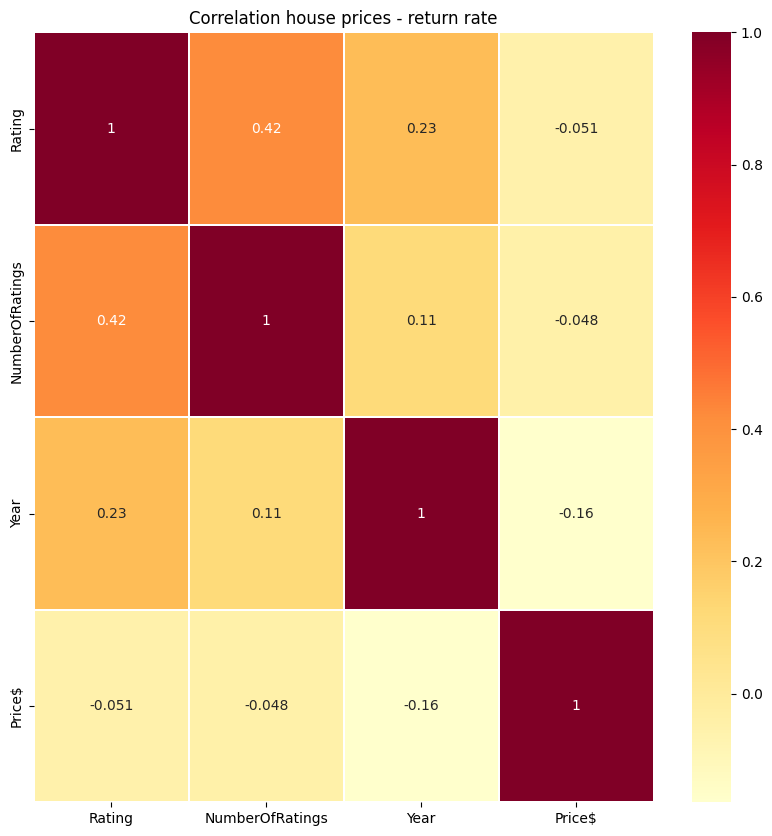

In [12]:
compute_correlations_matrix(df)

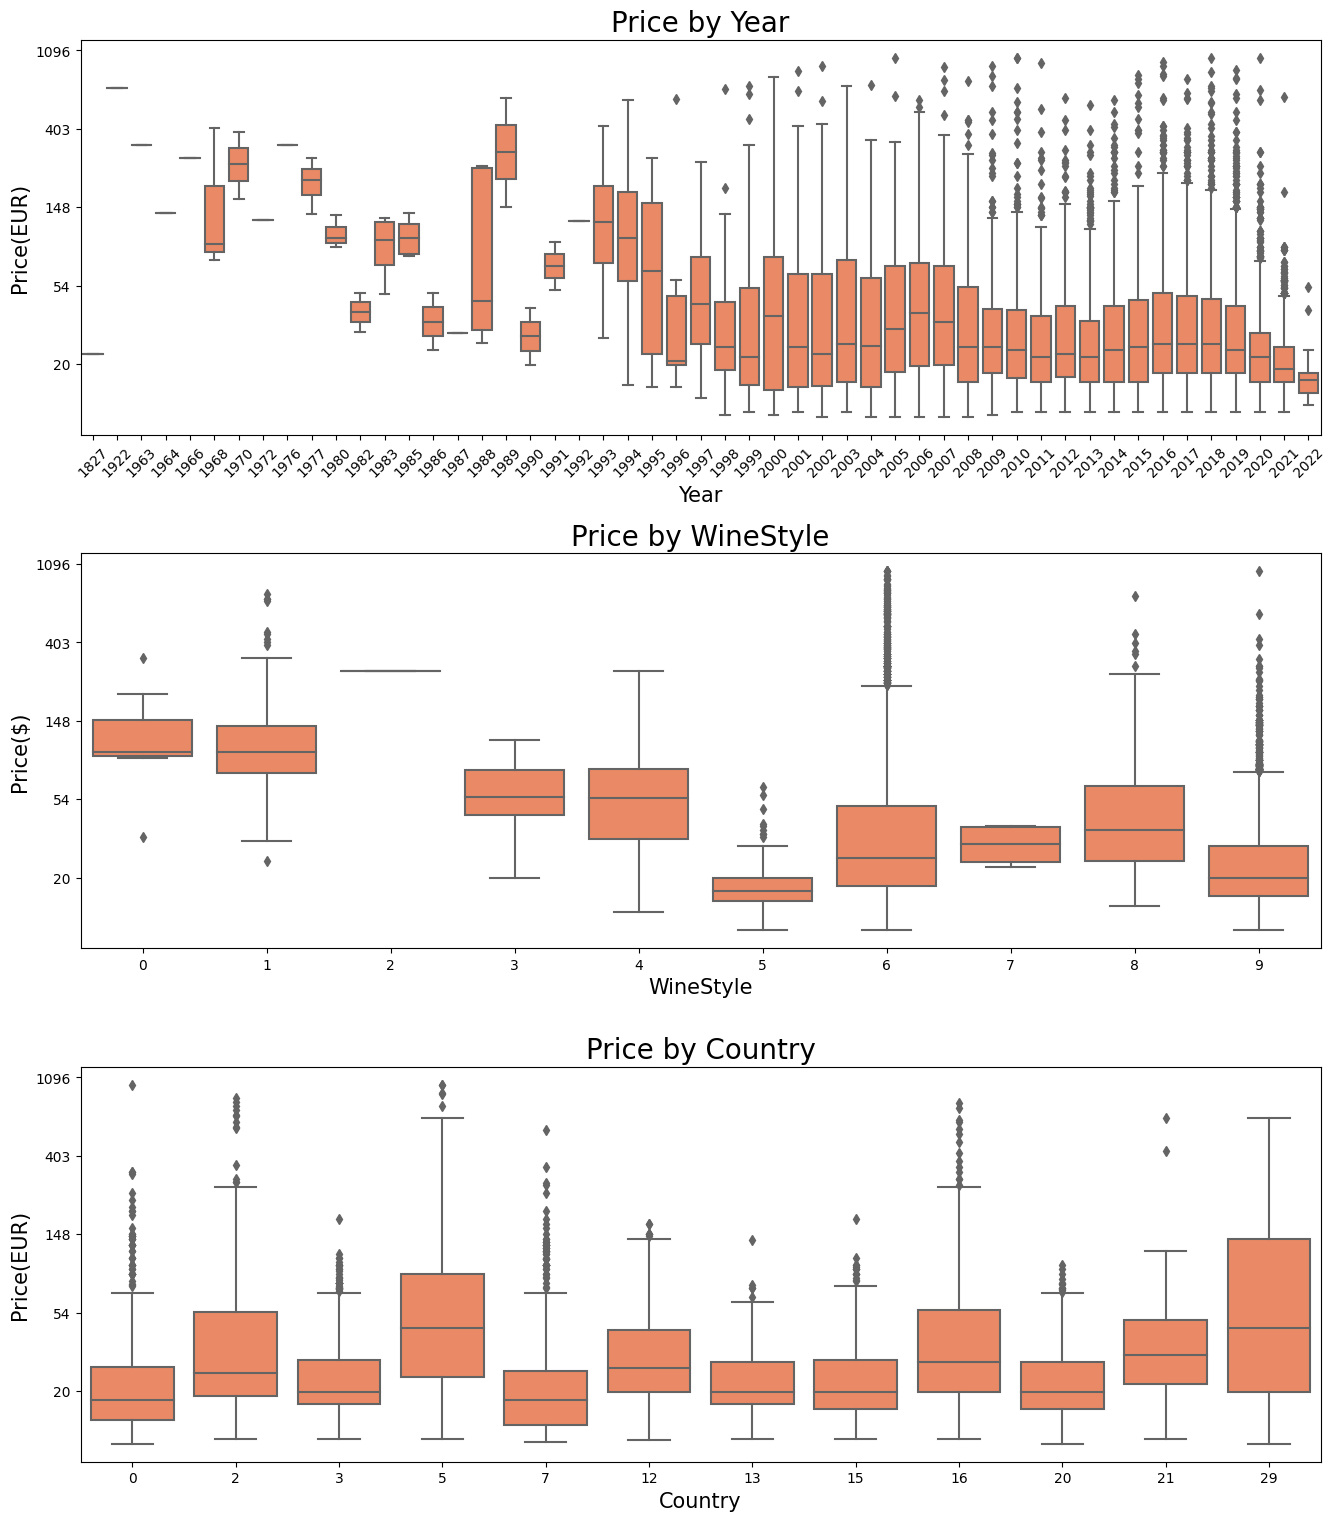

In [93]:
LEV_countries = df.Country.value_counts()[:12] #Countries with the largest export volume
plt.figure(figsize=(16,18))

plt.subplot(3,1,1)
graph = sns.boxplot(x='Year', y=np.log(df['Price$']),
                    data=df,
                    color='coral')
graph.set_title("Price by Year", fontsize=20)
graph.set_xlabel("Year", fontsize=15)
graph.set_ylabel("Price(EUR)", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
graph.set_yticklabels(np.exp(graph.get_yticks()).astype(int))

plt.subplot(3,1,2)
graph1 = sns.boxplot(x='Wine type', y=np.log(df['Price$']),
                 data=df,
                 color='coral')
graph1.set_title("Price by WineStyle", fontsize=20)
graph1.set_xlabel("WineStyle", fontsize=15)
graph1.set_ylabel("Price($)", fontsize=15)
graph1.set_xticklabels(graph1.get_xticklabels())
graph1.set_yticklabels(np.exp(graph1.get_yticks()).astype(int))

plt.subplot(3,1,3)
graph2 = sns.boxplot(x='Country', y=np.log(df['Price$']),
                 data=df[df.Country.isin(LEV_countries.index.values)],
                 color='coral')
graph2.set_title("Price by Country", fontsize=20)
graph2.set_xlabel("Country", fontsize=15)
graph2.set_ylabel("Price(EUR)", fontsize=15)
graph2.set_yticklabels(np.exp(graph2.get_yticks()).astype(int))

plt.subplots_adjust(hspace = 0.3, top = 0.9)

plt.show()

#### Predict the price of wine

In [106]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [76]:
def encoer_func(fet, df):
    lab_enc = LabelEncoder()
    for col in fet:
        df[col] = lab_enc.fit_transform(df[col])
    return df

In [77]:
fet = ['Name', 'Country', 'Varietal', 'Wine type']
en_df = encoer_func(fet, df)

In [111]:
X = en_df.drop('Price$', axis=1)
Y = en_df['Price$']
# prepare configuration for cross validation test harness
models = {
	'LR': LinearRegression(),
	'RR': RandomForestRegressor(),
	'GBR': GradientBoostingRegressor(),
	'XGBR': XGBRegressor(n_estimators=3000,
                       learning_rate=0.02,
                       max_depth=5, 
                       min_child_weight=2,
                       subsample=0.8,
                       colsample_bytree=0.7,
                       nthread=-1,
                       gamma=0,
                       reg_alpha=0.1,
                       reg_lambda=1.8
                       ),
	'CBR': CatBoostRegressor(iterations=3000,
                             learning_rate=0.03,
                             depth=6,
                             l2_leaf_reg = 2,
                             verbose=0
                            )

}
results = []
scoring = 'accuracy'
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, random_state=20, test_size=0.2)

# model = LinearRegression().fit(X_train, Y_train)
for name, model in models.items():
	model = model.fit(X_train, Y_train)
	y_train_pred = model.predict(X_test)
	results.append(y_train_pred)
	msg = "%s: %f (%f)" % (name, y_train_pred.mean(), y_train_pred.std())
	print(msg)

LR: 44.769041 (17.753049)
RR: 47.976254 (59.256091)
GBR: 45.201773 (35.787235)
XGBR: 45.932713 (59.167038)
CBR: 46.139248 (55.573556)
